https://github.com/SheffieldML/GPyOpt/blob/master/manual/GPyOpt_scikitlearn.ipynb

In [9]:
%pylab inline  
import GPy
import GPyOpt
import numpy as np
from sklearn import svm
from numpy.random import seed
seed(12345)

Populating the interactive namespace from numpy and matplotlib


In [10]:
# Let's load the dataset
GPy.util.datasets.authorize_download = lambda x: True # prevents requesting authorization for download.
data = GPy.util.datasets.olympic_marathon_men()
X = data['X']
Y = data['Y']
X_train = X[:20]
Y_train = Y[:20,0]
X_test = X[20:]
Y_test = Y[20:,0]

olympicMarathonTimes.csv
[==============================]   0.001/0.001MB


In [11]:
print(X.shape, Y.shape)

(27, 1) (27, 1)


In [12]:
print(X_train.shape, X_test.shape)

(20, 1) (7, 1)


The default parameters obtained: C=1.0, epilson=0.1, gamma=auto
RMSE = 0.56330740612


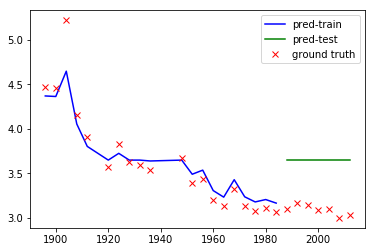

In [15]:
from sklearn import svm
svr = svm.SVR()
svr.fit(X_train,Y_train)
Y_train_pred = svr.predict(X_train)
Y_test_pred = svr.predict(X_test)
print("The default parameters obtained: C="+str(svr.C)+", epilson="+str(svr.epsilon)+", gamma="+str(svr.gamma))

plot(X_train,Y_train_pred,'b',label='pred-train')
plot(X_test,Y_test_pred,'g',label='pred-test')
plot(X_train,Y_train,'rx',label='ground truth')
plot(X_test,Y_test,'rx')
legend(loc='best')
print("RMSE = "+str(np.sqrt(np.square(Y_test_pred-Y_test).mean())))

# use GPyOpt

**We first write a wrap function for fitting with SVR. The objective is the RMSE from cross-validation. We optimize the parameters in log space.**

In [18]:
nfold = 3
def fit_svr_val(x):
    x = np.atleast_2d(np.exp(x))
    fs = np.zeros((x.shape[0],1))
    
    for i in range(x.shape[0]):
        fs[i] = 0
        
        for n in range(nfold):
            idx = np.array(range(X_train.shape[0]))
            idx_valid = np.logical_and(idx>=X_train.shape[0]/nfold*n, idx<X_train.shape[0]/nfold*(n+1))
            idx_train = np.logical_not(idx_valid)
            
            svr = svm.SVR(C=x[i,0], epsilon=x[i,1], gamma=x[i,2])
            svr.fit(X_train[idx_train], Y_train[idx_train])
            fs[i] += np.sqrt(np.square(svr.predict(X_train[idx_valid])-Y_train[idx_valid]).mean())
        fs[i] *= 1./nfold
    return fs

## -- Note that similar wrapper functions can be used to tune other Scikit-learn methods

In [19]:
domain =[{'name': 'C', 'type': 'continuous', 'domain': (0.,7.)},
         {'name': 'epsilon', 'type': 'continuous', 'domain': (-12.,-2.)},
         {'name': 'gamma', 'type': 'continuous', 'domain': (-12.,-2.)}]

In [20]:
opt = GPyOpt.methods.BayesianOptimization(
    f = fit_svr_val, # function to optimize       
    domain = domain, # box-constraints of the problem
    acquisition_type ='LCB', # LCB acquisition
    acquisition_weight = 0.1 # Exploration exploitation
) 

The set cost function is ignored! LCB acquisition does not make sense with cost.


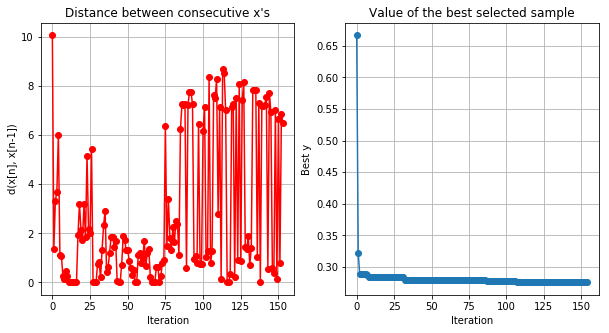

In [23]:
opt.run_optimization(max_iter=50)
opt.plot_convergence()

In [27]:
opt.X

array([[  2.21462888,  -2.3548548 ,  -2.38693264],
       [  1.28743168,  -5.46822903, -11.91611702],
       [  1.43192195,  -4.51093362, -10.93555623],
       [  3.9740752 ,  -5.46430129,  -9.01296286],
       [  4.16881292,  -4.52285191,  -5.43588817],
       [  2.08269137,  -4.39912475, -11.08516125],
       [  1.02919555,  -4.09370928, -10.92998221],
       [  1.47048947,  -5.00857206, -10.54801098],
       [  1.49527106,  -4.80280623, -10.71383645],
       [  1.62191499,  -4.74013678, -10.65823257],
       [  1.20925827,  -4.94985161, -10.75654815],
       [  1.45168697,  -4.9279702 , -10.7740568 ],
       [  1.46729303,  -4.93460754, -10.78826549],
       [  1.47158125,  -4.93130527, -10.79651533],
       [  1.4559191 ,  -4.91441335, -10.79250899],
       [  1.44502943,  -4.90212321, -10.78851185],
       [  1.43768378,  -4.89338626, -10.78483029],
       [  1.43253641,  -4.88686856, -10.78155616],
       [  2.57366529,  -6.23421812, -11.5645348 ],
       [  0.05503735,  -4.95651

In [28]:
opt.Y

array([[ 0.66652881],
       [ 0.32152603],
       [ 0.28825905],
       [ 0.4051212 ],
       [ 0.77834455],
       [ 0.29533129],
       [ 0.29680493],
       [ 0.28710111],
       [ 0.28384716],
       [ 0.28867136],
       [ 0.2866513 ],
       [ 0.2854632 ],
       [ 0.2854242 ],
       [ 0.28564983],
       [ 0.28570647],
       [ 0.28572226],
       [ 0.28571423],
       [ 0.28569577],
       [ 0.29514171],
       [ 0.30771618],
       [ 0.29300065],
       [ 0.29653385],
       [ 0.2940052 ],
       [ 0.30318418],
       [ 0.29876002],
       [ 0.29926508],
       [ 0.29679778],
       [ 0.28535318],
       [ 0.28539135],
       [ 0.28542115],
       [ 0.28544385],
       [ 0.28364738],
       [ 0.27917792],
       [ 0.28945206],
       [ 0.29366547],
       [ 0.28863511],
       [ 0.28557087],
       [ 0.28827632],
       [ 0.3030611 ],
       [ 0.28258438],
       [ 0.28583582],
       [ 0.28366442],
       [ 0.30049578],
       [ 0.28195066],
       [ 0.28104831],
       [ 0

In [31]:
x_best = np.exp(opt.X[np.argmin(opt.Y)])
print("The best parameters obtained: C="
      + str(x_best[0])
      + ", epilson="
      + str(x_best[1])
      + ", gamma="
      + str(x_best[2]))


The best parameters obtained: C=4.77712204161, epilson=6.29844201416e-06, gamma=1.29679575816e-05


In [32]:
np.exp(-12)

6.1442123533282098e-06

In [33]:
np.exp(-2)

0.1353352832366127

https://qiita.com/koji-murakami/items/b7887f1cef11ddc443a4

In [35]:
import GPyOpt
import numpy as np
from numpy.random import seed
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC

seed(0)

In [36]:
digits = datasets.load_digits()

n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target
print(X.shape)

(1797, 64)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)


In [38]:
kernel2domains = {
    'rbf':[
        {'name': 'C', 'type': 'continuous', 'domain': (1, 1100)},
        {'name': 'gamma', 'type': 'continuous', 'domain': (0.00005, 0.0015)}
    ],
    'linear': [
        {'name': 'C', 'type': 'continuous', 'domain': (1, 1100)},
    ],
}

In [39]:
def _get_model(param, kernel):
    _param = _refine_param(param, kernel)
    model = SVC(**_param)
    return model

def _refine_param(param, kernel):
    assert kernel in ['rbf', 'linear']
    if kernel == 'rbf':
        ret = {'kernel': kernel, 'C': param[0], 'gamma': param[1]}
    else:
        ret = {'kernel': kernel, 'C': param[0]}
    return ret

def _optimize(params, kernel):
    scores = np.zeros((params.shape[0], 1))
    for i, param in enumerate(params):
        model = _get_model(param, kernel)
        y_pred = cross_val_predict(model, X_train, y_train, cv=5)
        scores[i] -= f1_score(y_train, y_pred, average='macro')
    return scores


In [42]:
bests_per_kernel = []

for k, d in kernel2domains.items():
    
    f = lambda x: _optimize(x, k)
    
    opt = GPyOpt.methods.BayesianOptimization(f=f, domain=d)
    opt.run_optimization(max_iter=15)
    
    idx = np.argmin(opt.Y)
    x_best = opt.X[idx]  
    best_score = opt.Y[idx]
    
    bests_per_kernel.append((x_best, best_score, opt, k))

x_best, _, optimizer, kernel = min(bests_per_kernel, key=lambda x: x[1])

In [43]:
for param, score in zip(optimizer.X, optimizer.Y):
    _score = -score
    _param = _refine_param(param, kernel)
    print("%0.3f for %r" % (_score, _param))

0.988 for {'kernel': 'rbf', 'C': 967.3858888911418, 'gamma': 0.0010639038560208572}
0.987 for {'kernel': 'rbf', 'C': 250.00316105593728, 'gamma': 0.00060529876210854738}
0.987 for {'kernel': 'rbf', 'C': 645.07304986090094, 'gamma': 0.00092951805928823095}
0.986 for {'kernel': 'rbf', 'C': 657.31554804316966, 'gamma': 0.00072620510919961198}
0.986 for {'kernel': 'rbf', 'C': 1003.7388216067376, 'gamma': 0.00072838799486515016}
0.988 for {'kernel': 'rbf', 'C': 250.27666613304311, 'gamma': 0.0010860243034402845}
0.988 for {'kernel': 'rbf', 'C': 967.40816581901947, 'gamma': 0.0010533233054055363}
0.983 for {'kernel': 'rbf', 'C': 250.50302370615228, 'gamma': 0.0014838813374997875}
0.980 for {'kernel': 'rbf', 'C': 967.26166065413111, 'gamma': 5.0000000000000002e-05}
0.986 for {'kernel': 'rbf', 'C': 249.92239512117337, 'gamma': 0.00082869281252773901}
0.988 for {'kernel': 'rbf', 'C': 645.15465094545982, 'gamma': 0.0010398693951380142}
0.980 for {'kernel': 'rbf', 'C': 250.32390641388287, 'gamma'

In [47]:
print("%d experiments were performed." % len(optimizer.X))
print("Best parameters set found on development set:")
print(_refine_param(x_best, kernel))

clf = _get_model(x_best, kernel)
clf.fit(X_train, y_train)

y_true, y_pred = y_test, clf.predict(X_test)

print(classification_report(y_true, y_pred))

20 experiments were performed.
Best parameters set found on development set:
{'kernel': 'rbf', 'C': 967.3858888911418, 'gamma': 0.0010639038560208572}
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        89
          1       0.97      1.00      0.98        90
          2       0.99      0.98      0.98        92
          3       1.00      0.99      0.99        93
          4       1.00      1.00      1.00        76
          5       0.99      0.98      0.99       108
          6       0.99      1.00      0.99        89
          7       0.99      1.00      0.99        78
          8       1.00      0.98      0.99        92
          9       0.99      0.99      0.99        92

avg / total       0.99      0.99      0.99       899

